In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df=round(df)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,34.0,1.0,50,1
1,1,85,66,29,0,27.0,0.0,31,0
2,8,183,64,0,0,23.0,1.0,32,1
3,1,89,66,23,94,28.0,0.0,21,0
4,0,137,40,35,168,43.0,2.0,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,33.0,0.0,63,0
764,2,122,70,27,0,37.0,0.0,27,0
765,5,121,72,23,112,26.0,0.0,30,0
766,1,126,60,0,0,30.0,0.0,47,1


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.989583,0.373698,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.877643,0.510322,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,37.000000,1.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000



# Average values:

## 1)Pregnancies:2-3 <br>
## 2)Glucose:90-100 mg/dL <br>
## 3)BloodPressure:120/80 mmHg <br>
## 4)SkinThickness:20-25 mm <br>
## 5)Insulin: 70-100 μU/mL <br>
## 6)BMI: 22-24 <br>
## 7)DiabetesPedigreeFunction:0.3-0.5







In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

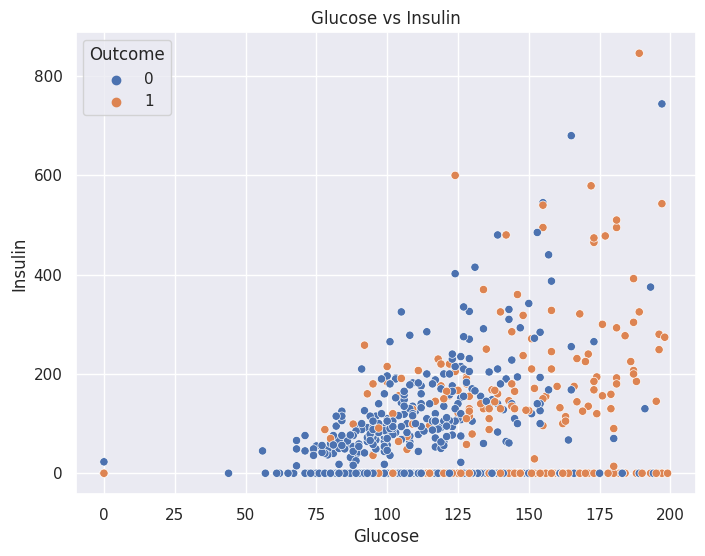

In [19]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x=df['Glucose'], y=df['Insulin'],hue=df['Outcome'])
plt.title('Glucose vs Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


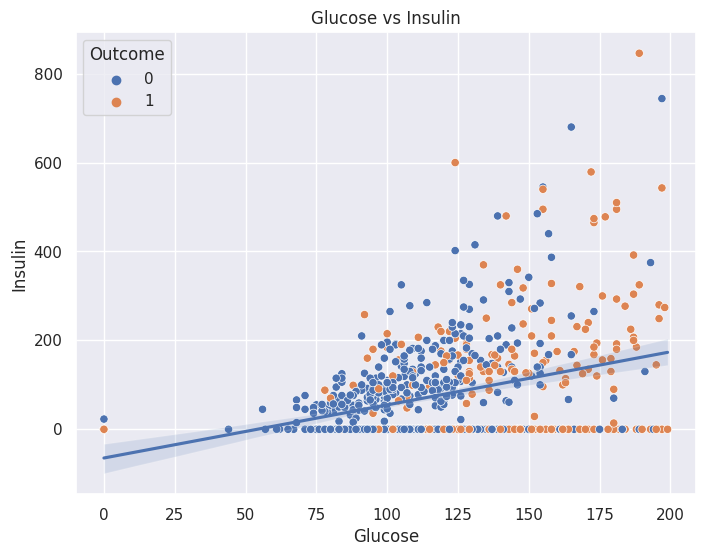

In [20]:
sns.set(rc={'figure.figsize':(8,6)})

# Create the scatter plot
sns.scatterplot(x=df['Glucose'], y=df['Insulin'], hue=df['Outcome'])
plt.title('Glucose vs Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

# Add the regression line
sns.regplot(x=df['Glucose'], y=df['Insulin'], scatter=False)

plt.show()


# *Insight: AS the level of glucose and insulin increases the chances of diabetes increase.* #

In [31]:
data=df.groupby(['Age','Outcome']).size().reset_index(name='Count')
data

,Age,Outcome,Count
0,21,0,58
1,21,1,5
2,22,0,61
3,22,1,11
4,23,0,31
...,...,...,...
91,68,0,1
92,69,0,2
93,70,1,1
94,72,0,1


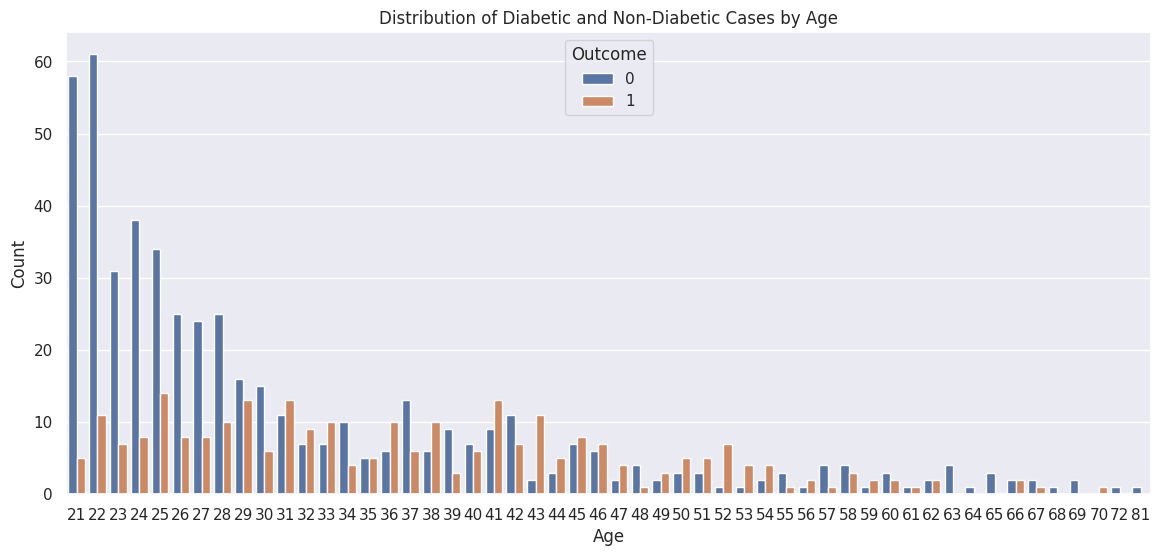

In [35]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Age', y='Count', hue='Outcome', data=data)
plt.title('Distribution of Diabetic and Non-Diabetic Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

# *Insight: People from age 22-43 are more likely to have diabetes.* #

In [37]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
df['DiabetesPedigreeFunction'].value_counts()

DiabetesPedigreeFunction
0.0    491
1.0    267
2.0     10
Name: count, dtype: int64

In [46]:
data2=df.groupby(['DiabetesPedigreeFunction','Outcome']).size().reset_index(name='Counts')
data2

,DiabetesPedigreeFunction,Outcome,Counts
0,0.0,0,349
1,0.0,1,142
2,1.0,0,145
3,1.0,1,122
4,2.0,0,6
5,2.0,1,4


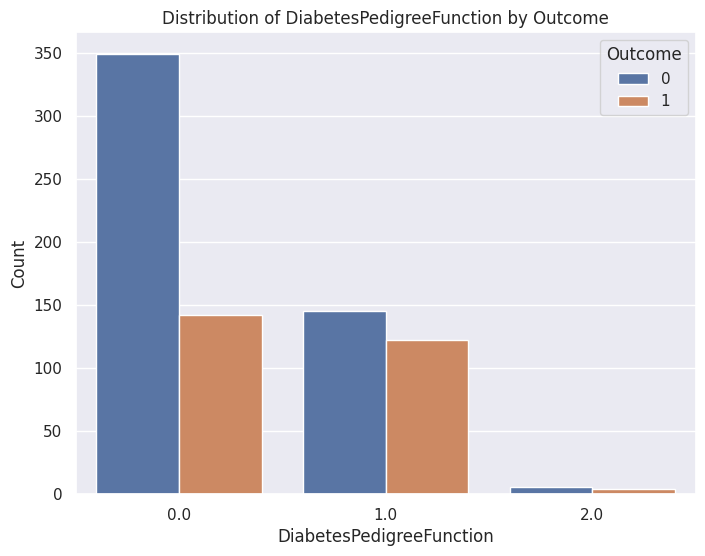

In [49]:
ax=sns.barplot(x='DiabetesPedigreeFunction',y='Counts',data=data2,hue='Outcome')
plt.title('Distribution of DiabetesPedigreeFunction by Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

for bars in ax.containers:
    ax.bar_label(bars)

# *Insigt:People with a higher DiabetesPedigreeFunction are at higher risk of diabetes* #

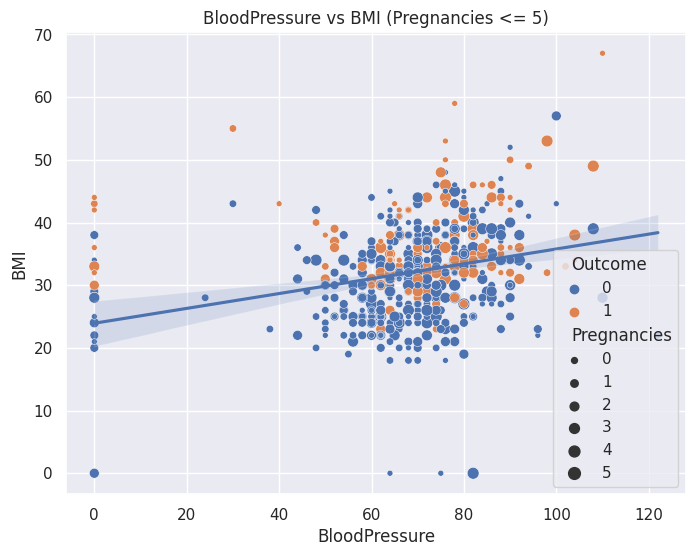

In [60]:

# Filter the data where 'Pregnancies' is less than or equal to 5
filtered_data = df[df['Pregnancies'] <= 5]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data['BloodPressure'], y=filtered_data['BMI'], hue=filtered_data['Outcome'], size=filtered_data['Pregnancies'])
plt.title('BloodPressure vs BMI (Pregnancies <= 5)')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')

sns.regplot(x=filtered_data['BloodPressure'], y=filtered_data['BMI'], scatter=False)

plt.show()


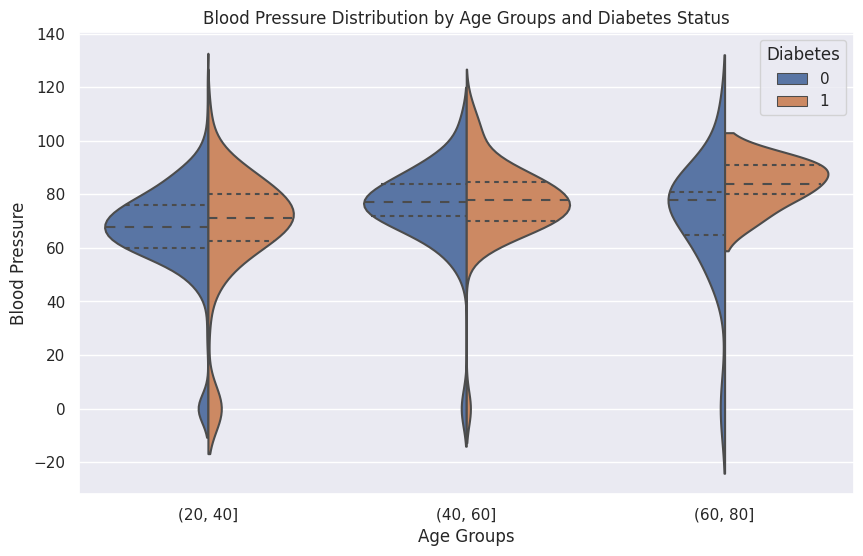

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorizing age groups for better visualization
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 80])

# Create a violin plot to display Blood Pressure distribution by Age Groups and Diabetes Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age_Group', y='BloodPressure', hue='Outcome', data=df, split=True, inner='quart')
plt.title('Blood Pressure Distribution by Age Groups and Diabetes Status')
plt.xlabel('Age Groups')
plt.ylabel('Blood Pressure')
plt.legend(title='Diabetes', loc='upper right')
plt.show()
